# 빅데이터처리_2016003709 
### Week04
#### Quiz1

In [1]:
# To find out where the pyspark
import findspark
findspark.init()

In [2]:
# Creating Spark Context
from pyspark import SparkContext
sc = SparkContext("local", "first app")

In [3]:
import matplotlib.pyplot as plt
import time

#### Quiz1 결과 가져오기

In [4]:
def get_answer(quiz_num):
    with open("./W04/result-{}.txt".format(quiz_num), mode="r") as file:
        answer = []
        while True:
            sentence = file.readline()
            sentence = sentence[:-1]
            
            if sentence:
                answer.append(sentence)
            else:
                break

    return answer

#### 행렬곱셈을 위해 map함수 설정

In [5]:
def maker(x, idx, state):
    result = []
    
    if(state == 0):    
        for i in range(idx):
            key = (x[1],str(i))
            value = (x[2],x[3])
            t = (key, value)
            result.append(t)

    elif(state == 1):
        for i in range(idx):
            key = (str(i),x[2])
            value = (x[1],x[3])
            t = (key, value)
            result.append(t)
    
    elif(state == 2):
        for i in range(idx):
            key = (x[2],str(i))
            value = (x[1],x[3])
            t = (key, value)
            result.append(t)
    
    return result

#### map 이후 mapValues를 통해 키의 값 더하기

In [6]:
def summ(x, column):
    x = list(x)
    li = [1 for i in range (column)]

    for data in x:
        print(data)
        li[int(data[0])] = li[int(data[0])] * int(data[1])
        
    return sum(li)

In [7]:
answer1 = get_answer(1)

In [8]:
answer1

['13001', '16437', '59453', '-10713', '3467']

In [9]:
A = [(200,100),(400,200),(800,400),(1600,800),(3200,1600)]
B = [(100,10),(200,20),(400,40),(800,80),(1600,160)]

#### Quiz1 해답

In [13]:
def Quiz1(row1, column1, row2, column2): 
    start = time.time()
    
    A = sc.textFile("./W04/A{}x{}.txt".format(row1, column1)).map(lambda line: line.split(",")).flatMap(lambda line: maker(line, column2, 0))
    B = sc.textFile("./W04/B{}x{}.txt".format(row2, column2)).map(lambda line: line.split(",")).flatMap(lambda line: maker(line, row1, 1))
    C = A.union(B)
    result = C.groupByKey().mapValues(lambda x: summ(x, column1)).map(lambda data : data[1]).reduce(lambda a, b : a+b)
    
    end = time.time()
    duration = end - start
    
    return result, duration 

#### Quiz1 실행코드
5가지의 테스트케이스중, 메모리문제로 인하여 1번, 2번, 3번 케이스만 동작. <br>4번케이스부터는 Caused by: java.io.IOException: No space left on device 에러메세지가 뜸

In [14]:
Quiz1_result = []

for i in range(5):
    row1 = A[i][0]
    column1 = A[i][1]
    
    row2 = B[i][0]
    column2 = B[i][1]
    
    result, duration = Quiz1(row1, column1, row2, column2)
    
    print("Round {}: A{}x{} multiply B{}x{}".format(i+1, row1, column1, row2, column2))
    print()
    print("Result : {}".format(result))
    print("Answer : {}".format(answer1[i]))
    print("Duration : {}".format(duration))
    print()
    print("================================")
    print()
    Quiz1_result.append(duration)

Round 1: A200x100 multiply B100x10

Result : 13001
Answer : 13001
Duration : 13.691105842590332


Round 2: A400x200 multiply B200x20

Result : 16437
Answer : 16437
Duration : 38.639512062072754


Round 3: A800x400 multiply B400x40

Result : 59453
Answer : 59453
Duration : 364.34282970428467




Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 6.0 failed 1 times, most recent failure: Lost task 1.0 in stage 6.0 (TID 13, localhost, executor driver): java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:51)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at sun.nio.ch.FileChannelImpl.transferToTrustedChannel(FileChannelImpl.java:516)
	at sun.nio.ch.FileChannelImpl.transferTo(FileChannelImpl.java:609)
	at org.apache.spark.util.Utils$.copyFileStreamNIO(Utils.scala:389)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply$mcJ$sp(Utils.scala:354)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:348)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:348)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:369)
	at org.apache.spark.util.Utils.copyStream(Utils.scala)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.writePartitionedFile(BypassMergeSortShuffleWriter.java:201)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:163)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1891)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1879)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1878)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1878)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:927)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:927)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2112)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2061)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2050)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:738)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:990)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:385)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:989)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.IOException: No space left on device
	at sun.nio.ch.FileDispatcherImpl.write0(Native Method)
	at sun.nio.ch.FileDispatcherImpl.write(FileDispatcherImpl.java:60)
	at sun.nio.ch.IOUtil.writeFromNativeBuffer(IOUtil.java:93)
	at sun.nio.ch.IOUtil.write(IOUtil.java:51)
	at sun.nio.ch.FileChannelImpl.write(FileChannelImpl.java:211)
	at sun.nio.ch.FileChannelImpl.transferToTrustedChannel(FileChannelImpl.java:516)
	at sun.nio.ch.FileChannelImpl.transferTo(FileChannelImpl.java:609)
	at org.apache.spark.util.Utils$.copyFileStreamNIO(Utils.scala:389)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply$mcJ$sp(Utils.scala:354)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:348)
	at org.apache.spark.util.Utils$$anonfun$copyStream$1.apply(Utils.scala:348)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.util.Utils$.copyStream(Utils.scala:369)
	at org.apache.spark.util.Utils.copyStream(Utils.scala)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.writePartitionedFile(BypassMergeSortShuffleWriter.java:201)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:163)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:123)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:408)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:414)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


#### 그래프<br>
<li>1번 : A(200x100) X B(100x10)</li>
<li>2번 : A(400x200) X B(200x20)</li>
<li>3번 : A(800x400) X B(400x40)</li>

In [15]:
X1 = [1, 2, 3]

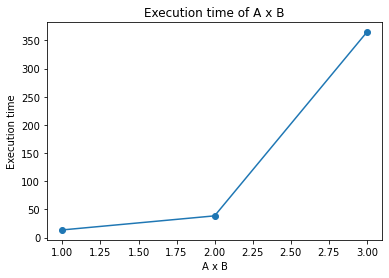

In [16]:
plt.plot(X1, Quiz1_result, linestyle='-', marker='o')
plt.xlabel("A x B")
plt.ylabel("Execution time")
plt.title("Execution time of A x B")
plt.show()